# Linear Discriminant Analysis(LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image

%matplotlib inline

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
## add "_" in column values
df_wine.columns = df_wine.columns.str.replace(" ","_")

In [6]:
df_wine.columns

Index(['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [7]:
df_wine.groupby("Class_label").size()
## Data seems like balanced

Class_label
1    59
2    71
3    48
dtype: int64

In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class_label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [9]:
cols = df_wine.columns.drop("Class_label")

In [10]:
cols

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [11]:
X = df_wine.iloc[:,1:].values
y = df_wine.iloc[:,0].values

In [12]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(178, 13)
(178,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


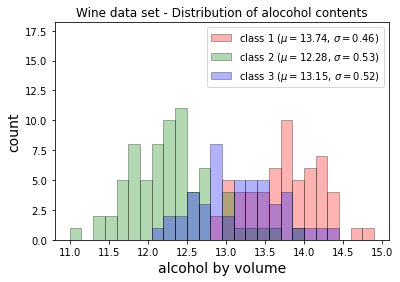

In [13]:
### 
from math import floor,ceil
## floor() method in Python returns floor of x i.e., the largest integer not greater than x. 
## The method ceil() in Python returns ceiling value of x i.e., the smallest integer not less than x. 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin --width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.15)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,0], bins=bins)[0])


for label,color in zip(range(1,4), colors): #### you can select range (1,2) to check class 1 and so on to verify class wise distribution
    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    plt.hist(X[:,0][y == label], bins=bins, alpha=0.3,
         label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color,edgecolor="black")
plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

If you see the above graph I plotted the histogram of Column "Alcohol" to check that whether we can take Alcohol by volume as pefect feature that will separate all the classes(1,2,3). I think no, becuase we can see in graph there are some overlap among class 1, class 2 and class 3. **If you see there is some different colours outoff these 3 colurs , reason is due to overlapping of colurs.As we can conclude that "Alcohol" is not separating linearly all the classes.
So "Alcohol" does not work for classification as separate feature.**

**Now check the overlapping with feature "Malic_acid"**

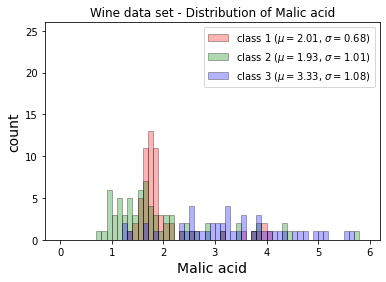

In [14]:
### 
from math import floor,ceil
## floor() method in Python returns floor of x i.e., the largest integer not greater than x. 
## The method ceil() in Python returns ceiling value of x i.e., the smallest integer not less than x. 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin --width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,1])), ceil(max(X[:,1])), 0.10)   ## change bin range = 0.10 due to mallic acid data

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,1], bins=bins)[0])


for label,color in zip(range(1,4), colors): #### you can select range (1,2) to check class 1 and so on to verify class wise distribution
    mean = np.mean(X[:,1][y == label]) # class sample mean
    stdev = np.std(X[:,1][y == label]) # class standard deviation
    plt.hist(X[:,1][y == label], bins=bins, alpha=0.3,
         label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color,edgecolor="black")
plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of Malic acid')
plt.xlabel('Malic acid', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

Again we can see that "Malic acid" is also not a pefect feature that also does not separate all the classes(1,2,3) becuase we can see in graph there are some overlap among class 1, class 2 and class 3. **As we can conclude that "Malic acid" is not separating linearly all the classes.**

**Conclusion:**
We can try same way for other variables and check the same conclusion and dyou will find that none of the features are able to linearly separate the all the classes.Now what should we do to classify all the class perfectly.
Can we use PCA, no that only use for dimentionalty reduction of input variables which consider that which variables have high variance and make principal compennets on that basis. Still we stuck now. So how we can classify all the classes with reducing the number of dimensions (i.e. input variables) in a dataset while retaining as much information as possible.
Yes, we have LDA which will work better in this case.
Lets use LDA

In [15]:
## Lets scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X)

In [16]:
df_X_scale = pd.DataFrame(X_scale,columns=cols)

In [17]:
type(X_scale)

numpy.ndarray

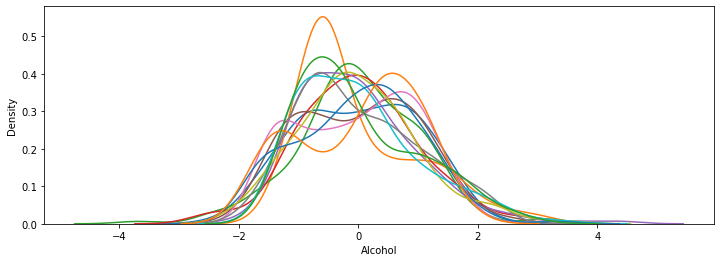

In [18]:
i = []
plt.figure(figsize=(12,4))
for i in cols:
    sns.kdeplot(df_X_scale[i])

### LDA

LDA is based upon the concept of searching for a linear combination of variables (predictors) that best separates two classes (targets)
Here are the 5 steps that constitute LDA.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/LDA_Steps.png" width="550" height="600" align="left"/></img>

**Step-1 Compute the mean vector for all 3 classes**

In [19]:

np.set_printoptions(precision=4)

mean_vector = []
for label in range(1, 4):  ## becuase we have 3 classes so took range this
    mean_vector.append(np.mean(X_scale[y == label], axis=0))
    print('d(13) dimentions(columns) Mean Vector for Class %s: %s\n' % (label, mean_vector[label - 1]))

d(13) dimentions(columns) Mean Vector for Class 1: [ 0.9192 -0.2923  0.3256 -0.738   0.4632  0.8734  0.9569 -0.579   0.5404
  0.2034  0.4588  0.7714  1.1745]

d(13) dimentions(columns) Mean Vector for Class 2: [-0.8917 -0.3624 -0.445   0.2231 -0.3646 -0.0581  0.0518  0.0146  0.069
 -0.8528  0.4336  0.2453 -0.7241]

d(13) dimentions(columns) Mean Vector for Class 3: [ 0.1892  0.8953  0.2579  0.5771 -0.0301 -0.9876 -1.2528  0.6901 -0.7663
  1.0114 -1.2054 -1.3109 -0.3726]



In [20]:
print(type(mean_vector))  ### combined mean for all 3 classes
print(mean_vector)

<class 'list'>
[array([ 0.9192, -0.2923,  0.3256, -0.738 ,  0.4632,  0.8734,  0.9569,
       -0.579 ,  0.5404,  0.2034,  0.4588,  0.7714,  1.1745]), array([-0.8917, -0.3624, -0.445 ,  0.2231, -0.3646, -0.0581,  0.0518,
        0.0146,  0.069 , -0.8528,  0.4336,  0.2453, -0.7241]), array([ 0.1892,  0.8953,  0.2579,  0.5771, -0.0301, -0.9876, -1.2528,
        0.6901, -0.7663,  1.0114, -1.2054, -1.3109, -0.3726])]


**Step-2 Compute the Scatter Matrix(With-in(S_W) and Between class(S_B)**

**See below the scatter matrix**

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/scatter_matrix.png" width="600" height="600" align="left"/></img>

**1st create the Within-class scatter matrix(S_W)**

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/WithinClass.png" width="350" height="600" align="left"/></img>

where c is the total number of distinct classes

where x is a sample (i.e. row) and n is the total number of samples with a given class.

In [21]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mi in zip(range(1, 4), mean_vector):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for x in X_scale[y == label]:
        x, mi = x.reshape(d, 1), mi.reshape(d, 1)  # make column vectors
        class_scatter += (x - mi).dot((x - mi).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix(S_W): %sX%s' % (S_W.shape[0], S_W.shape[1]))
#print(S_W)

Within-class scatter matrix(S_W): 13X13


In [22]:
S_W

array([[ 69.9756,   1.586 , -10.5167,  -6.3107,   0.2722,   9.3862,
          4.9117,  -1.6993,   6.3521,  23.0461,   0.7418,  -1.5222,
          8.424 ],
       [  1.586 , 125.1573,  12.2831,  19.5649,  -9.8093,  -3.646 ,
         -1.484 ,  12.8798,   4.7349, -17.5794, -29.0382,  10.324 ,
        -16.5377],
       [-10.5167,  12.2831, 154.4941,  93.0013,  30.9692,  16.5741,
         19.2481,  36.1874,   3.0045,   2.7101,   6.5174,   9.8587,
         -1.0205],
       [ -6.3107,  19.5649,  93.0013, 126.347 ,  11.9466,   9.1457,
         13.0007,  19.8655,   8.5374,  -2.314 ,  -2.2665,  16.7472,
         -5.4944],
       [  0.2722,  -9.8093,  30.9692,  11.9466, 155.8597,  11.3629,
          8.2262, -28.4214,  27.9955,   9.4206,   6.801 ,  -4.8791,
         18.6351],
       [  9.3862,  -3.646 ,  16.5741,   9.1457,  11.3629,  85.9391,
         45.4112, -17.4787,  45.1227,  24.1358,  -1.8026,  23.7094,
          7.4967],
       [  4.9117,  -1.484 ,  19.2481,  13.0007,   8.2262,  45.4112,
  

In [23]:
print('Class label distribution in training Data: %s' % np.bincount(y)[1:])

Class label distribution in training Data: [59 71 48]


In [24]:
### Other way to compute Within Class scatter matrix
## Covariance Matrix --https://www.youtube.com/watch?v=ieL0jxzLhCE
### https://www.youtube.com/watch?v=9B5vEVjH2Pk
#d = 13  # number of features
#S_W = np.zeros((d, d))
#for label in zip(range(1, 4)):
#    class_scatter = np.cov(X_scale[y == label].T)
#    S_W += class_scatter
#print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
#                                                     S_W.shape[1]))

**2nd create the Between Class scatter matrix(S_B)**

Next, we calculate the between class scatter matrix using the following formula.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/betweenclass.png" width="400" height="600" align="left"/></img>

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/betweenclass1.png" width="300" height="600" align="left"/></img>

In [25]:
### Check to show how enumerate works in below code
for i,mv in enumerate(mean_vector,start=1):
    print(i,mv) 

1 [ 0.9192 -0.2923  0.3256 -0.738   0.4632  0.8734  0.9569 -0.579   0.5404
  0.2034  0.4588  0.7714  1.1745]
2 [-0.8917 -0.3624 -0.445   0.2231 -0.3646 -0.0581  0.0518  0.0146  0.069
 -0.8528  0.4336  0.2453 -0.7241]
3 [ 0.1892  0.8953  0.2579  0.5771 -0.0301 -0.9876 -1.2528  0.6901 -0.7663
  1.0114 -1.2054 -1.3109 -0.3726]


In [26]:
mean_overall = np.mean(X_scale, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mv in enumerate(mean_vector,start=1):  ### https://www.geeksforgeeks.org/enumerate-in-python/
    n = X_scale[y == i, :].shape[0] ## size of the class-- no of rows(this is count)-- as per dataset size on n is (40X13)
    mi = mv.reshape(d, 1)  # make column vector -- sample mean (size is 13X1)
    m = mean_overall.reshape(d, 1)  # make column vector --- overall mean ( m size is 13X1)
    S_B += n * (mi - m).dot((mi - m).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [27]:
mean_overall = np.mean(X_scale, axis=0)

In [28]:
np.round(mean_overall,4)

array([-0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.])

In [29]:
#S_B

**Step-3 Compute the eigenvalues and Eigen Vector**

Now we will solve the generalized eigenvalue problem for the below matrix to obtain the linear discriminants.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Gerenalized_matrix.PNG" width="200" height="600" align="left"/></img>

In [30]:
eigen_vals, eigen_vect = np.linalg.eig(np.linalg.inv(S_W).dot(S_B)) ## Compute the eigenvalues and right eigenvectors of a square array
eigen_vals.shape, eigen_vect.shape

((13,), (13, 13))

In [31]:
eigen_vals

array([ 0.0000e+00+0.0000e+00j,  4.1285e+00+0.0000e+00j,
        9.0817e+00+0.0000e+00j,  1.8677e-15+0.0000e+00j,
        7.5068e-16+0.0000e+00j, -8.4488e-17+6.0276e-16j,
       -8.4488e-17-6.0276e-16j, -4.3955e-16+1.2732e-16j,
       -4.3955e-16-1.2732e-16j,  1.8102e-17+1.8934e-16j,
        1.8102e-17-1.8934e-16j,  3.3061e-17+0.0000e+00j,
        1.9438e-16+0.0000e+00j])

**Step-4 Sort the eigenvector by using eigen value and select the top k eigen vector and after that form dXk dimentional matrix W**

The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. Thus, we sort the eigenvalues from highest to lowest and select the first k eigenvectors. In order to ensure that the eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array.

In [32]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vect[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
# That lambda function just grabs the first element from each (eigen_vals, eigen_vect) pair, 
# meaning that the tuples are sorted by descending order of eigenvalue magnitude.
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print (eigen_val[0])

Eigenvalues in decreasing order:

9.081739435042467
4.128469045639483
1.867700597670615e-15
7.506764658244466e-16
6.086573892028544e-16
6.086573892028544e-16
4.576179372210815e-16
4.576179372210815e-16
1.9437658613147546e-16
1.902058343367409e-16
1.902058343367409e-16
3.3060698476458215e-17
0.0


Just looking at the values, it’s difficult to determine how much of the variance is explained by each component. Thus, we express it as a percentage.

In [33]:
print("Explained Variance :\n")
eigen_val_sum = sum(eigen_vals.real)
for i , j in enumerate(eigen_pairs,start=1):
    print("Eigen Value {}: {}".format(i,(j[0]/eigen_val_sum)*100)+"%")    

Explained Variance :

Eigen Value 1: 68.74788878860782%
Eigen Value 2: 31.25211121139217%
Eigen Value 3: 1.4138312808627217e-14%
Eigen Value 4: 5.6825482120301426e-15%
Eigen Value 5: 4.607477543544669e-15%
Eigen Value 6: 4.607477543544669e-15%
Eigen Value 7: 3.464123506379801e-15%
Eigen Value 8: 3.464123506379801e-15%
Eigen Value 9: 1.471411949445942e-15%
Eigen Value 10: 1.4398397619151119e-15%
Eigen Value 11: 1.4398397619151119e-15%
Eigen Value 12: 2.502662885661856e-16%
Eigen Value 13: 0.0%


**Plot the Cumulative Discriminability**

It tells us that how best a particular a eigen vector(linear discriminant) is able to discriminate th classes.

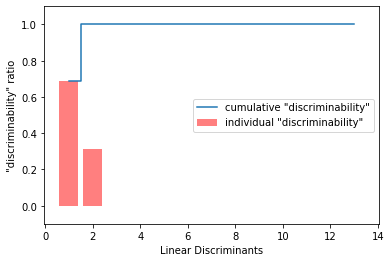

In [34]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)] ## also tell the explained variance 
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"',color="red")
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

Discriminative Ratio is the S_B/S_W ,means ratio of "Distance between classes"/"Distnce within Class".
If it is close to 1 than measn there is much separation between the class and very very less variance within the class datasets.If you see the above graph you will observer that 1st Linear discriminant(Eigen Vector) is able to explain close to 70% discriminability and 2nd close to 30%.If we take cumulative means 1st 2 components (Eigen Vectors) cumulatively are able to explain close to 100% discriminability(see the blue line).

**Create a matrix W**

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our d X k dimensional eigenvector
matrix W (here 13X2) and thereby reducing the initial 13 dimensional feature space into a 2 dimensional feature
subspace.

In [35]:
## Select 1st two eigen vector(Linear Discriminant)
EV1 = eigen_pairs[0][1]  ## 1st eigen vector
EV2 = eigen_pairs[1][1]  ## 2nd eigen vector
W = np.hstack((EV1.reshape(13,1).real,EV2.reshape(13,1).real))
W

array([[-0.14  , -0.4187],
       [ 0.0789, -0.2018],
       [-0.0433, -0.3807],
       [ 0.221 ,  0.2892],
       [-0.0132,  0.0039],
       [ 0.1654,  0.0119],
       [-0.7095,  0.2907],
       [-0.0796,  0.1201],
       [ 0.0328,  0.104 ],
       [ 0.352 , -0.3473],
       [-0.08  ,  0.2049],
       [-0.3514, -0.0215],
       [-0.3624, -0.5315]])

In [36]:
## Other way to do above steps
#W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
#               eigen_pairs[1][1][:, np.newaxis].real))
#W

**Step-5 Use matrix W to transfor the samples onto a new subspace.**

we will save the dot product of X and W into a new matrix Y.
where X is a n×d matrix with n samples and d dimensions, and Y is a n×k matrix with n samples and k ( k<n) dimensions. In other words, Y is composed of the LDA components, or said yet another way, the new feature space.

In [37]:
X_lda = X_scale.dot(W)  ### Y =X.dot(W)  ,, Y is newly created subspace LDA component

In [38]:
print(X_lda.shape)
print(type(X_lda))

(178, 2)
<class 'numpy.ndarray'>


Lets plot the data as a function of the two LDA components and use a different color for each class.

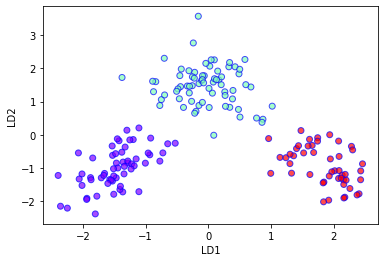

In [39]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(x=X_lda[:,0],
            y=X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

**Rather than implementing the Linear Discriminant Analysis algorithm from scratch every time, we can use the predefined LinearDiscriminantAnalysis class made available to us by the scikit-learn library**

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_sk = sklearn_lda.fit_transform(X_scale, y)

We can also obtain the variance explained by each component.

In [41]:
sklearn_lda.explained_variance_ratio_

array([0.6875, 0.3125])

We can see that both are same as we computed usuing manually

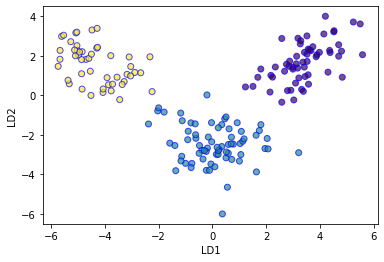

In [42]:
plt.xlabel('LD1')
plt.ylabel('LD2')
## for grapg
plt.scatter(x=X_lda_sk[:,0],
            y=X_lda_sk[:,1],
    c=y,
#    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

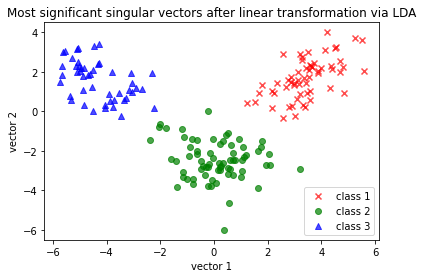

In [43]:
for label,marker,color in zip(range(1,4),('x', 'o', '^'),('red', 'green', 'blue')):
    plt.scatter(x=X_lda_sk[:,0][y == label],
                y=X_lda_sk[:,1][y == label],
                marker=marker, color=color,
                alpha=0.7, label='class {}'.format(label))

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend(loc='lower right')
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

In [44]:
### Lets compare with PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scale, y)

PCA()

In [45]:
pca.explained_variance_

array([4.7324, 2.5111, 1.4542, 0.9242, 0.858 , 0.6453, 0.5541, 0.3505,
       0.2905, 0.2523, 0.2271, 0.1697, 0.104 ])

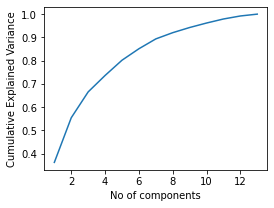

In [46]:
plt.figure(figsize= (4,3))
plt.plot(range(1,14),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("No of components")
##plt.annotate("point where PCA is able to explain more than 90% of variance",xy=(2,0.99))
plt.show()

we can see from the above graph that cumulative Explained Variance ratio helps us to select the principal components. As we can observe that 4 Principal components can explain 80% variance in data

In [47]:
PC = PCA(n_components=4)
post_pca = PC.fit(X_scale)
X_pca_post = PC.transform(X_scale)

Lets Plot the graph wuth PCA

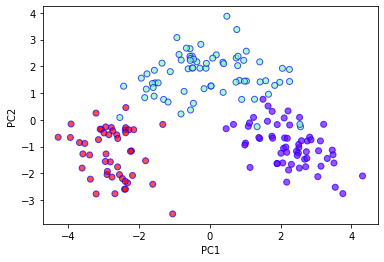

In [48]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca_post[:,0],
    X_pca_post[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

#### We can see that If we use PCA there are still overlap in classes becuase PCA only selected components on the input dataset variance although LDA consider the output classes variaces with input dataset.

### Lets check the Model Accuracy using LDA

In [49]:
## lets split the train and test
from sklearn.model_selection import train_test_split
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.3, random_state=42)

In [50]:
print(X_train_lda.shape)
print(y_train_lda.shape)
print(type(X_train_lda))
print(type(y_train_lda))

(124, 2)
(124,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
print(X_test_lda.shape)
print(y_test_lda.shape)
print(type(X_test_lda))
print(type(y_test_lda))

(54, 2)
(54,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [53]:
knn = KNeighborsClassifier()
lda_knn = knn.fit(X_train_lda,y_train_lda)

In [54]:
y_pred_lda = lda_knn.predict(X_test_lda)

In [55]:
print("Model Accuracy after LDA :",metrics.accuracy_score(y_test_lda,y_pred_lda))

Model Accuracy after LDA : 1.0


### Lets check the Model Accuracy using PCA

In [56]:
## lets split the train and test
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_post, y, test_size=0.3, random_state=42)

In [57]:
knn_p = KNeighborsClassifier()
pca_knn = knn_p.fit(X_train_pca,y_train_pca)

In [58]:
y_pred_pca = pca_knn.predict(X_test_pca)

In [59]:
print("Model Accuracy after LDA :",metrics.accuracy_score(y_test_pca,y_pred_pca))

Model Accuracy after LDA : 0.9444444444444444


We can see that when we checked the model accuracy after LDA it is almost close to 100% but when we checked the accuarcy after PCA that is close to 95%.
Now we can say that when we use LDA it consider the classification while doing dimentionality reduction.